<a href="https://www.kaggle.com/code/kusumakar/sleep-quality-analysis-tensorflow?scriptVersionId=205597940" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-sleep-patterns/student_sleep_patterns.csv


In [2]:
df=pd.read_csv("/kaggle/input/student-sleep-patterns/student_sleep_patterns.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [4]:
df['Weekend_Sleep_Duration']=abs(df['Weekend_Sleep_End']-df['Weekend_Sleep_Start'] )
df['Weekday_Sleep_Duration'] =abs(df ['Weekday_Sleep_End']- df['Weekday_Sleep_Start'] )

In [5]:
df.drop(columns=['Student_ID','Weekend_Sleep_Start','Weekend_Sleep_End','Weekday_Sleep_Start','Weekday_Sleep_End'],inplace=True)

In [6]:
df.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekend_Sleep_Duration,Weekday_Sleep_Duration
0,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,3.01,6.75
1,21,Male,1st Year,6.3,6.0,1.9,5,74,2,3.11,0.52
2,22,Male,4th Year,5.1,6.7,3.9,5,53,5,9.55,13.12
3,24,Other,4th Year,6.3,8.6,2.8,4,55,9,5.34,13.13
4,20,Male,4th Year,4.7,2.7,2.7,0,85,3,2.89,12.00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

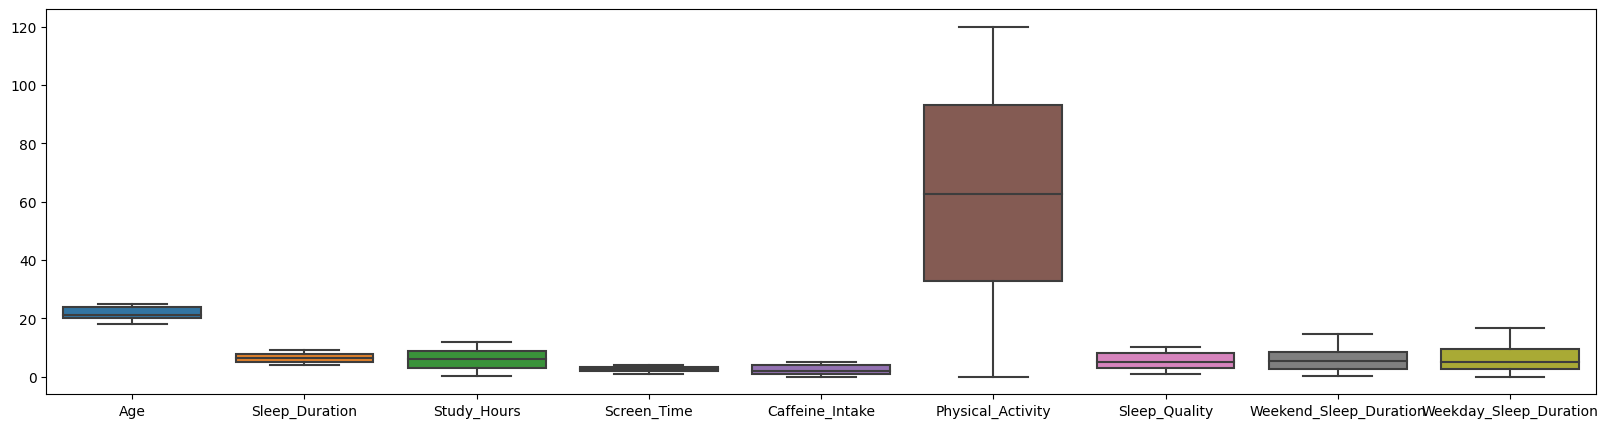

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Sleep_Quality'>

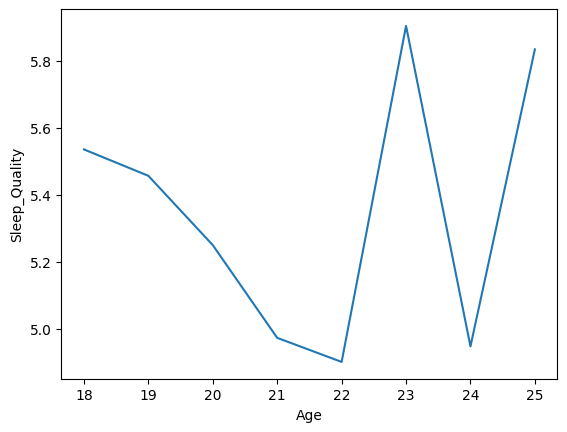

In [9]:
df1 =df.groupby("Age").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Age',y='Sleep_Quality',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Sleep_Quality'>

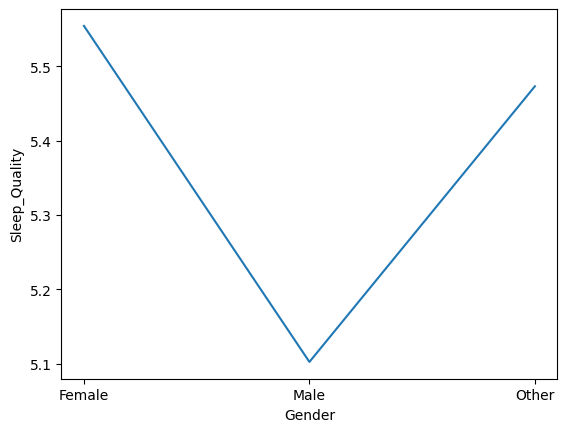

In [10]:
df1 =df.groupby("Gender").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Gender',y='Sleep_Quality',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='University_Year', ylabel='Sleep_Quality'>

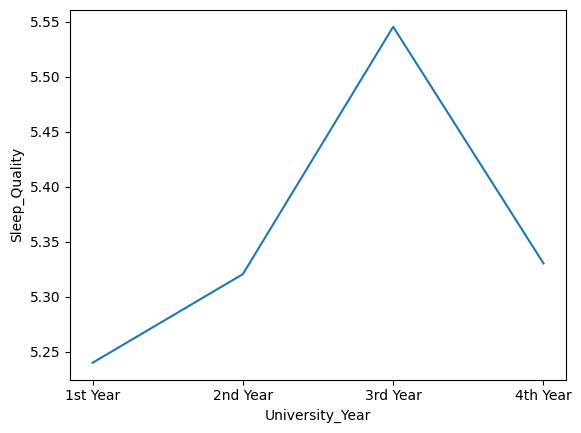

In [11]:
df1 =df.groupby("University_Year").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='University_Year',y='Sleep_Quality',data=df1)

<Axes: xlabel='Study_Hours', ylabel='Sleep_Quality'>

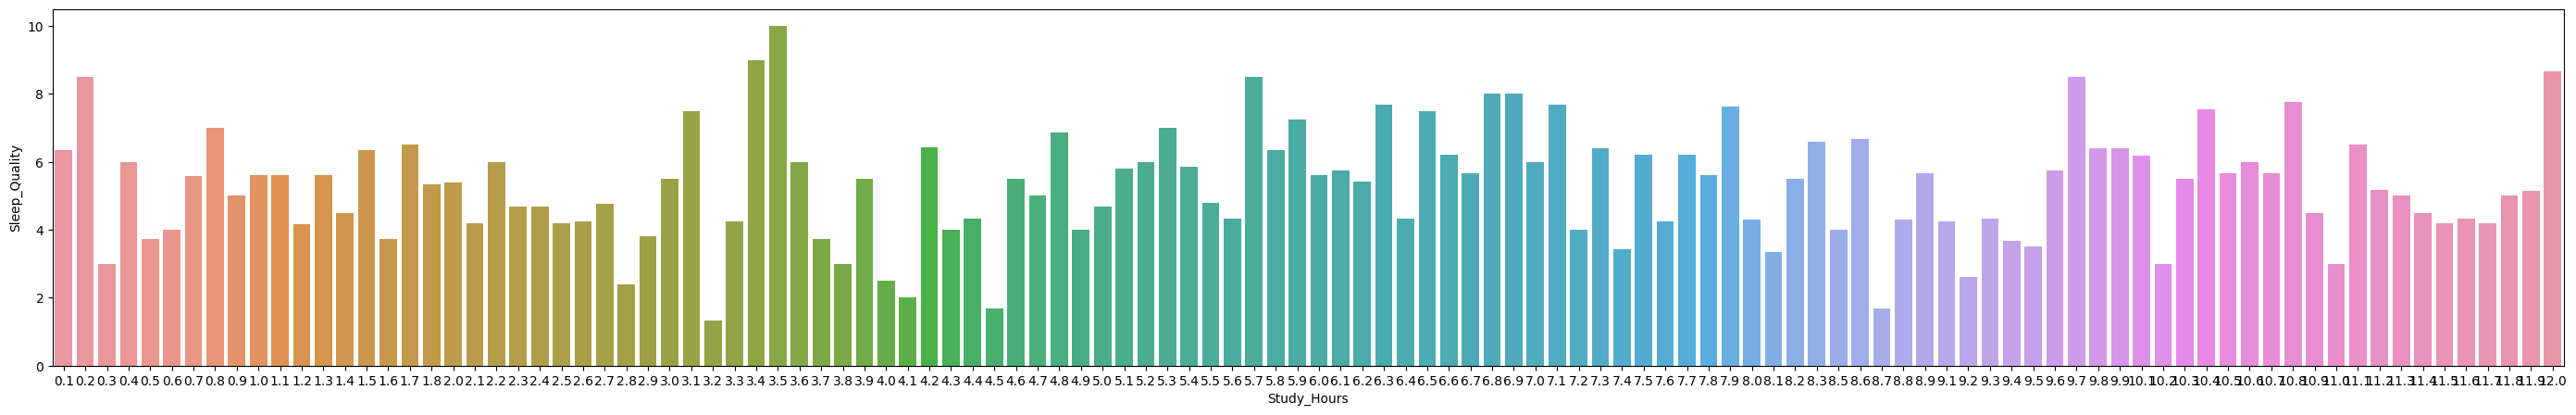

In [12]:
df1 =df.groupby("Study_Hours").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(35,5))
sns.barplot(x='Study_Hours',y='Sleep_Quality',data=df1)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


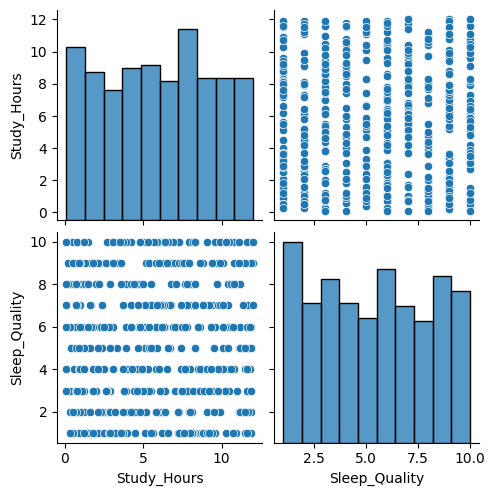

In [13]:
sns.pairplot(df[['Study_Hours','Sleep_Quality']])

<Axes: xlabel='Screen_Time', ylabel='Sleep_Quality'>

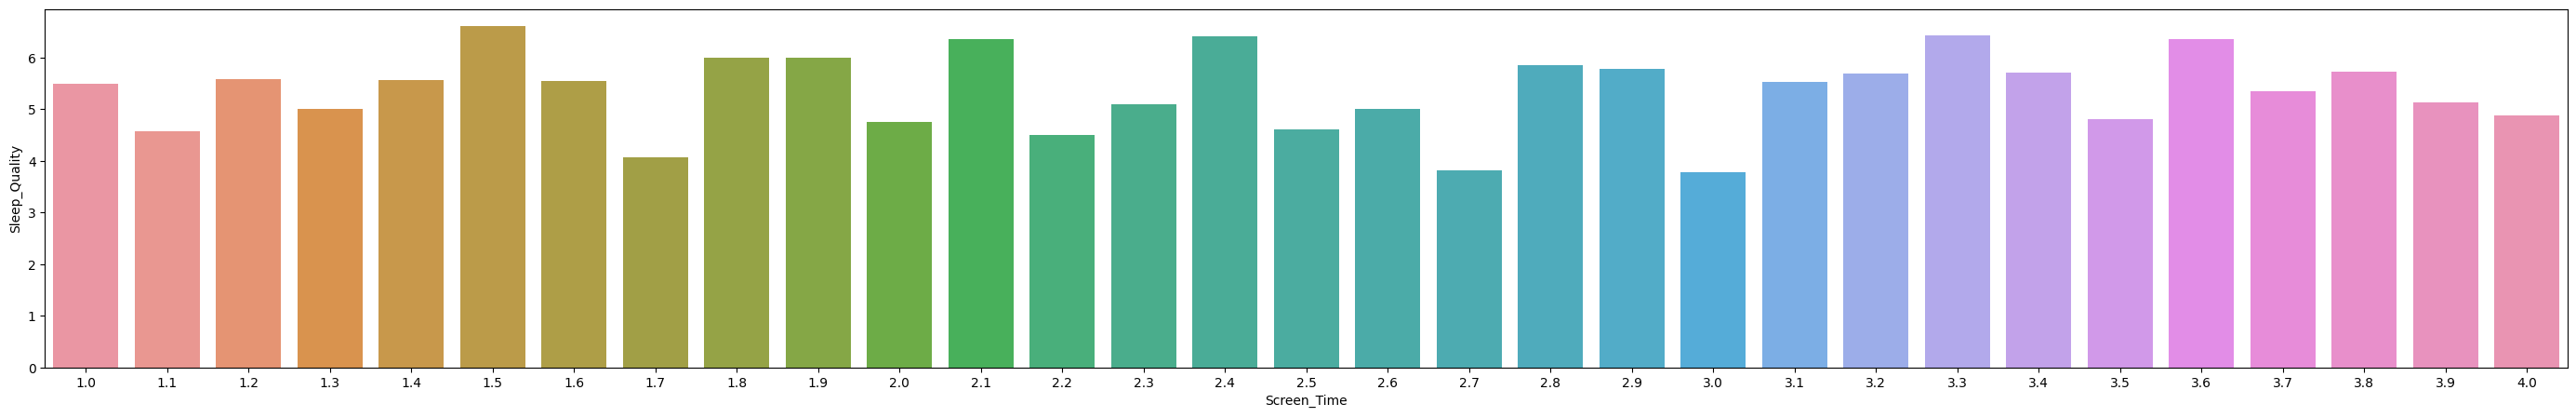

In [14]:

df1 =df.groupby("Screen_Time").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(35,5))
sns.barplot(x='Screen_Time',y='Sleep_Quality',data=df1)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


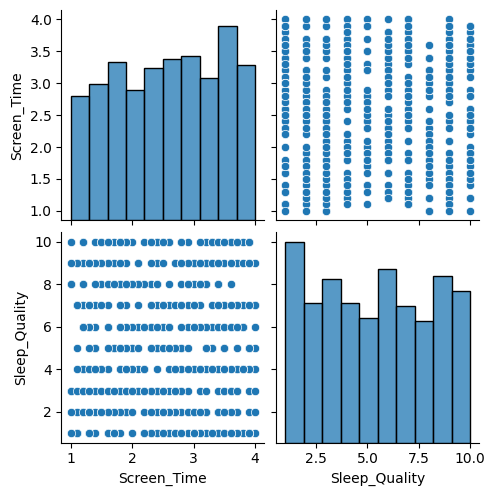

In [15]:
sns.pairplot(df[['Screen_Time','Sleep_Quality']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Caffeine_Intake', ylabel='Sleep_Quality'>

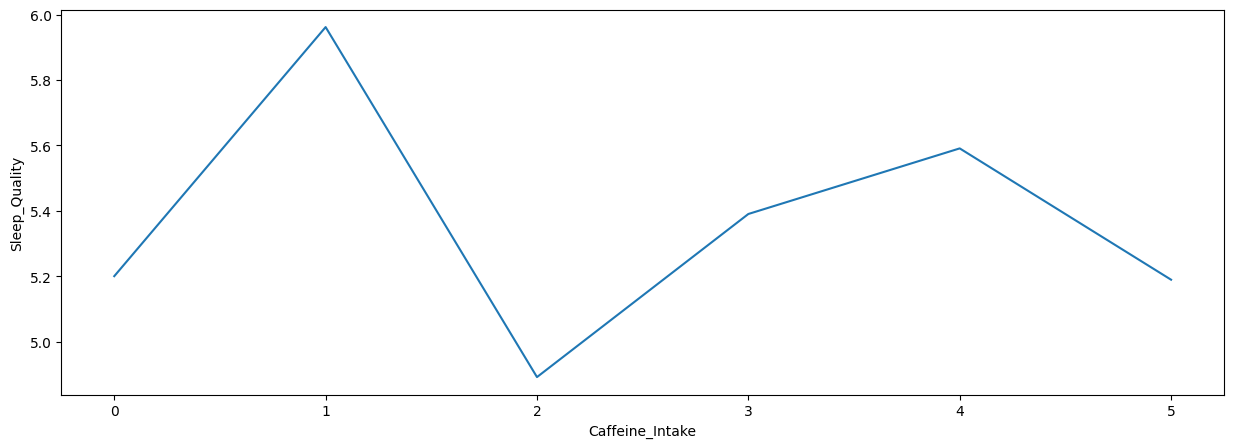

In [16]:


df1 =df.groupby("Caffeine_Intake").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Caffeine_Intake',y='Sleep_Quality',data=df1)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Physical_Activity', ylabel='Sleep_Quality'>

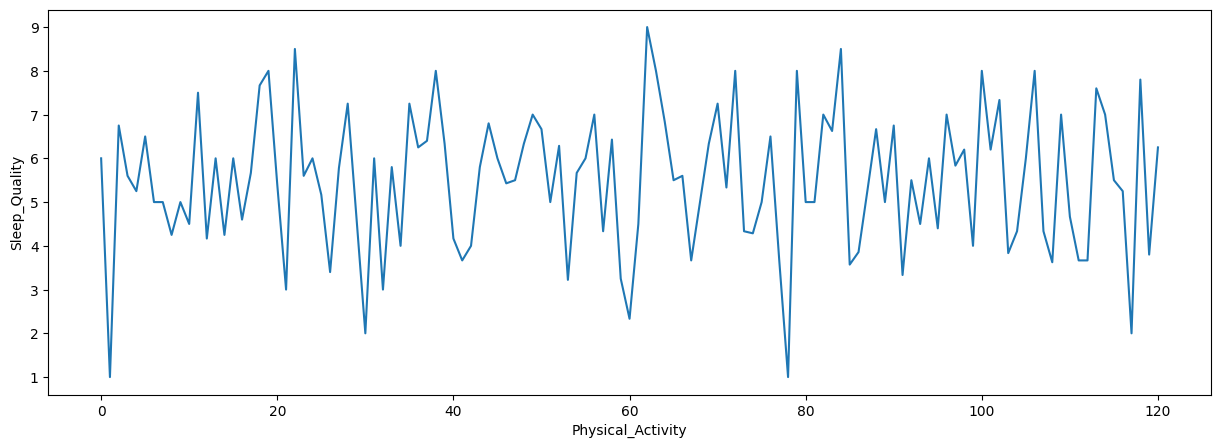

In [17]:


df1 =df.groupby("Physical_Activity").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Physical_Activity',y='Sleep_Quality',data=df1)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


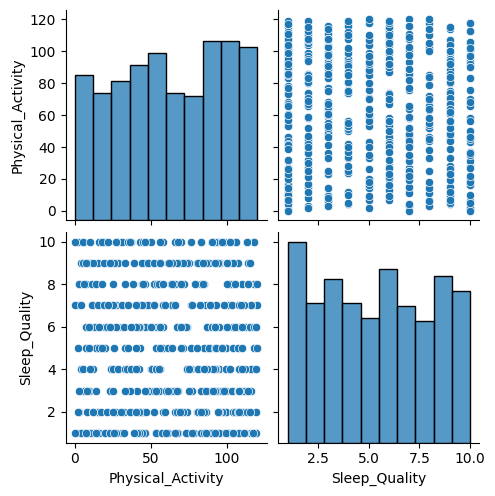

In [18]:
sns.pairplot(df[['Physical_Activity','Sleep_Quality']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weekend_Sleep_Duration', ylabel='Sleep_Quality'>

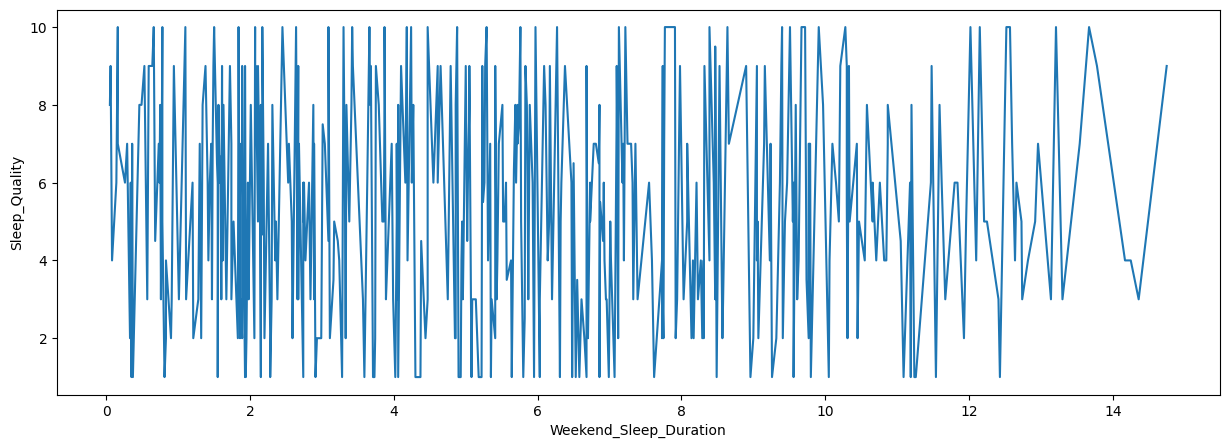

In [19]:


df1 =df.groupby("Weekend_Sleep_Duration").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Weekend_Sleep_Duration',y='Sleep_Quality',data=df1)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weekday_Sleep_Duration', ylabel='Sleep_Quality'>

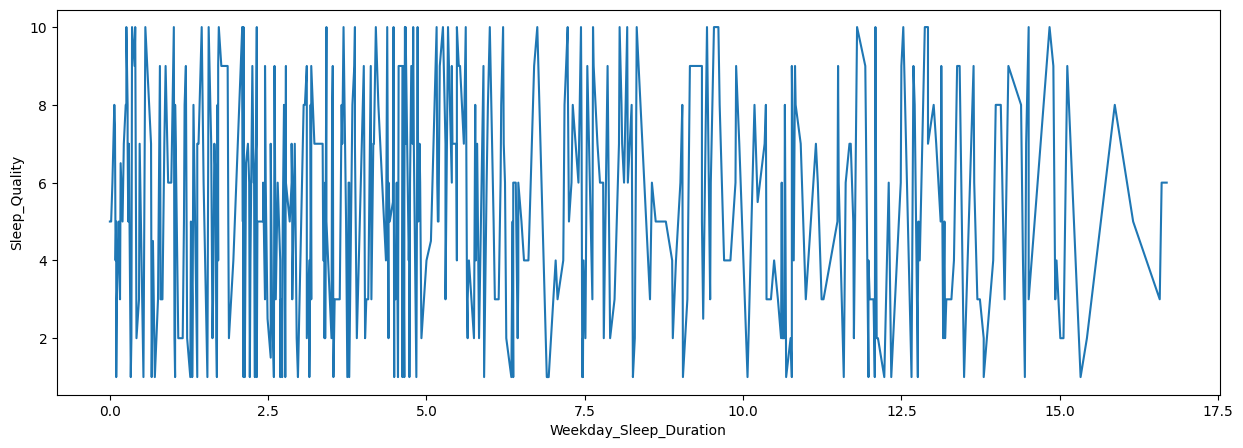

In [20]:


df1 =df.groupby("Weekday_Sleep_Duration").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Weekday_Sleep_Duration',y='Sleep_Quality',data=df1)


In [21]:
df.dtypes

Age                         int64
Gender                     object
University_Year            object
Sleep_Duration            float64
Study_Hours               float64
Screen_Time               float64
Caffeine_Intake             int64
Physical_Activity           int64
Sleep_Quality               int64
Weekend_Sleep_Duration    float64
Weekday_Sleep_Duration    float64
dtype: object

['Age', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Weekend_Sleep_Duration', 'Weekday_Sleep_Duration']


<Axes: >

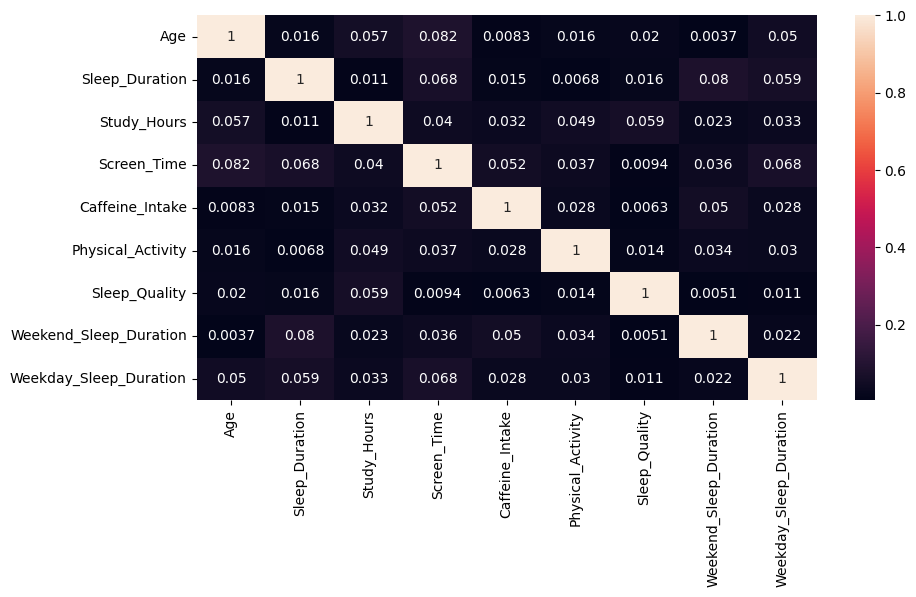

In [22]:
numeric_columns = list(df.select_dtypes(include=['int64','float64']).columns)
print(numeric_columns)
plt.figure(figsize=(10,5))
sns.heatmap(df[numeric_columns].corr().abs(),annot=True)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Summary of EDA </p>
<div>

<ui>
 <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">There are no Nulls in the Dataset</p>
 <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">There are no Outliers in the Dataset</p>
<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">Students at the age of 18 and 24 have LEAST sleep Quality </p>

<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">Males have the LEAST sleep quality. Females have the BEST </p>

<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">First Year Students have the worst sleep Quality whereas Third year students enjoy good sleep </p>

<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">Study Hours, Screen Time and Physical Activity Do not seem to have a major impact on Sleep Quality </p>
</ui>

<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:yellow">Caffeine Intake Adversely impacts the sleep quality. More the caffeine intake, worst is the Sleep Quality </p>
</ui>
</div>

</div>

<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:red">Model Training </p>
</ui>

<p> I will select Age,Gender,University Year,Caffeine Intake as the Features and Predict the Sleep Quality</p>

In [23]:
X= df[['Age', 'Gender', 'University_Year',  'Caffeine_Intake']]
Y=df['Sleep_Quality']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



In [25]:
transformer = ColumnTransformer(
    [
        ("scaler",StandardScaler(),['Age','Caffeine_Intake']),
        ("encoder",OneHotEncoder(),["University_Year","Gender"])
    ],remainder="passthrough"
)



In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [27]:
X_train.columns

Index(['Age', 'Gender', 'University_Year', 'Caffeine_Intake'], dtype='object')

In [28]:
X

,Age,Gender,University_Year,Caffeine_Intake
0,24,Other,2nd Year,2
1,21,Male,1st Year,5
2,22,Male,4th Year,5
3,24,Other,4th Year,4
4,20,Male,4th Year,0
...,...,...,...,...
495,24,Male,2nd Year,4
496,20,Male,2nd Year,3
497,21,Male,3rd Year,1
498,18,Female,2nd Year,0


In [29]:
X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [30]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train_transformed.shape[1],)),
    Dense(64,activation='relu'),
  
    Dense(1)
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=5,           # number of epochs to wait before stopping
    restore_best_weights=True  # restores weights from the epoch with the best performance
)

In [34]:
model.compile(loss='mae',metrics=['mae'],optimizer='adam')

In [35]:
history=model.fit(X_train_transformed,Y_train,epochs=200,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.3956 - mae: 5.3956 - val_loss: 4.3793 - val_mae: 4.3793
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7045 - mae: 4.7045 - val_loss: 3.8663 - val_mae: 3.8663
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0690 - mae: 4.0690 - val_loss: 3.4567 - val_mae: 3.4567
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6712 - mae: 3.6712 - val_loss: 3.1636 - val_mae: 3.1636
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8291 - mae: 2.8291 - val_loss: 3.0215 - val_mae: 3.0215
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4804 - mae: 2.4804 - val_loss: 3.0154 - val_mae: 3.0154
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4913 - mae: 2.4913 - val_loss: 3.0901 - val_mae: 3.0901
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5088 - mae: 2.5088 - val_loss: 3.0853 - val_mae: 3.0853
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.56

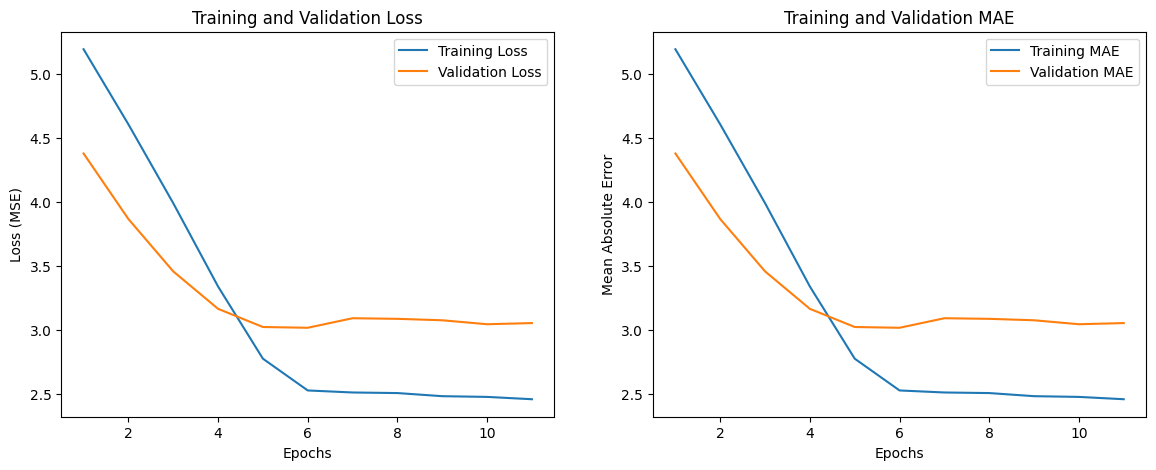

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Create a range for epochs
epochs = range(1, len(loss) + 1)

# Plot the loss over epochs
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [37]:
predictions=model.predict(X_test_transformed)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(Y_test,predictions)

2.7055171699523926